In [1]:
from sklearn.cluster import MiniBatchKMeans
import datasets
import utils
import tester
import models
import numpy as np
import matplotlib.pyplot as plt
import progressbar
%matplotlib inline

In [4]:
data = np.loadtxt('data/datasetTC3.dat')
data = data / np.linalg.norm(data, axis=0)

In [5]:
def inter_cluster_distance(model, X, c1, c2):
    return min(utils.distance(x1, x2) for x1 in c1 for x2 in c2)

def cluster_diameter(c):
    return max(utils.distance(c[i], c[j]) for i in range(len(c)) for j in range(i+1, len(c)))

def dunn_index(model, X):
    clusters = [[] for _ in range(model.n_clusters)]
    for i, x in enumerate(X):
        clusters[model.labels_[i]].append(x)
        
    num = min(inter_cluster_distance(model, X, clusters[i], clusters[j]) for i in range(model.n_clusters) for j in range(i+1, model.n_clusters))
    den = max(cluster_diameter(c) for c in clusters)
    return num / den

In [6]:
def d(model, i, j):
    return utils.distance(model.cluster_centers_[i], model.cluster_centers_[j])

def S(model, X, i):
    m = model.cluster_centers_[i]
    q = 2
    cluster = [x for k, x in enumerate(X) if model.labels_[k] == i]
    return (sum(utils.distance(x, m)**q for x in cluster) / len(cluster))**(1/q)

def R(model, X, i):
    return max((S(model, X, i) + S(model, X, j)) / d(model, i, j) for j in range(model.n_clusters) if j != i)

def db_index(model, X):
    return sum(R(model, X, i) for i in range(model.n_clusters)) / model.n_clusters

In [7]:
def Bk(clusters, X):
    x_mean = np.mean(X, axis=0)
    norm_prototypes = np.array([np.mean(c, axis=0) - x_mean for c in clusters])
    return np.sum([len(c) * np.outer(w, w) for c, w in zip(clusters, norm_prototypes)], axis=0)

def Wk(clusters, X):
    Ws = np.array([np.mean(c, axis=0) for c in clusters])
    return np.sum([np.sum([np.outer(x - w, x - w) for x in c], axis=0) for c, w in zip(clusters, Ws)], axis=0)

def ch_index(model, X):
    clusters = [[] for _ in range(model.n_clusters)]
    for i, x in enumerate(X):
        clusters[model.labels_[i]].append(x)
    return (Bk(clusters, X).trace() / (model.n_clusters - 1)) / (Wk(clusters, X).trace() / (len(X) - model.n_clusters))
        

In [19]:
dunn_indexes = []
db_indexes = []
ch_indexes = []

models = [MiniBatchKMeans(n_clusters=k) for k in range(2, 11)]
for m in models:
    m.fit(data)

with progressbar.ProgressBar(max_value=9) as bar:
    for i, m in enumerate(models):
        bar.update(i)
        #dunn_indexes.append(dunn_index(m, data))
        db_indexes.append(db_index(m, data))
        ch_indexes.append(ch_index(m, data))
        

100% (9 of 9) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05


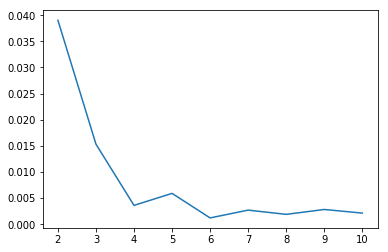

In [93]:
plt.plot(range(2, 11), dunn_indexes)
plt.show()

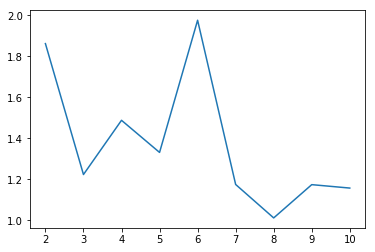

In [20]:
plt.plot(range(2, 11), db_indexes)
plt.show()

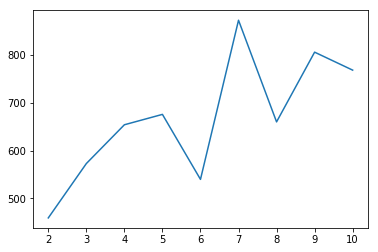

In [149]:
plt.plot(range(2, 11), ch_indexes)
plt.show()

In [70]:
pca = utils.PCA()
pca.fit(data)
pca_data = pca.transform(data, min_var=0.999)

In [71]:
print(pca_data)

[[ 0.01119416  0.00057063  0.00391737  0.04842799 -0.02406039]
 [ 0.00015471  0.00372553  0.01533744  0.02421323 -0.01202218]
 [-0.01425592  0.00044067  0.01064633  0.02022728 -0.02433521]
 ...
 [ 0.01163878 -0.03267511  0.01558183  0.03401096 -0.02362064]
 [ 0.01713297 -0.03287751  0.01456895  0.04663494 -0.02378038]
 [ 0.01722359 -0.03301817  0.01462231  0.0466084  -0.02377894]]


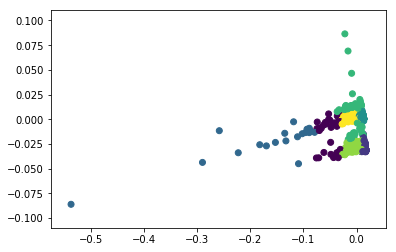

In [146]:
m = models[]
#print(dunn_index(model, data))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=model.labels_)
plt.show()